 <h1><center>Credit Card Fraud Detection</center></h1>

<img src="image.jpeg" alt="Drawing" style="width: 200px;"/>

### Rational Statement

<p style='text-align: justify;'> Although the increasing digitalization of the payments and money transfer services has indisputable benefits, it has some disadvantages as well. Certainly, one of these is the growth of frauds.  According to the Nilson Report, publication covering the card and mobile payment industry, payment card fraud losses worldwide reached US\$27.85 billion in 2018 and are expected to rise to $35.67 billion in 2024.</p> 

<p style='text-align: justify;'> As transaction times becomes faster and fraudster schemes are continuously innovating, it is almost impossible to identify, predict and  counteract fraudulent operations without an robust automation process. Thus, trying to reduce their loss payouts, payment card issuers and merchants have been trying ingenious tools. Machine learning, for instance, is one of the most efficient and, therefore, is progressively being used.  </p>


<p style='text-align: justify;'> Hence, in line with market trends, this project aims to build a machine learning model that, based on labeled historical data, detect fraudulent operations. </p>



### Data Requirements

<p style='text-align: justify;'>The dataset, gathered from Kaggle.com, comprises of 284,807 credit card operations, being 284,315 non-fraudulent and 492 fraudulents. Therefore, highly unbalaced.</p> 
    
<p style='text-align: justify;'>There are a total of 31 features, all of them numerical. Due to confidentiality reasons, Principal Component Analysis was used to transform data from 28 features. The only features which have not been transformed are: Time, Amount and Class. The first refers to the time elapsed between each transaction and the first one occured in the dataset. The second is the transaction amount. Lastly, the third is a binary variable, which has value 1 for fraudulent transactions and 0 otherwise.</p>



### Assumptions, Limitations and Constraints

<p style='text-align: justify;'>The first challenge is to handle the unbalanced data. In this case, in order to verify the quality of the model, we can not rely only in its accuracy. In other words, we will need additional metrics, such as precision and recall, to be certain of its quality.</p>

<p style='text-align: justify;'>Considering the trade off between false positive and false negative predictions, as we are dealing with frauds, it is better to try to minimize the ratio of false negatives. That is, fraudulent transaction considered as non-fraudulent.</p>  

<p style='text-align: justify;'>Another critical question is the wide range of the variable ‘Amount’, which goes from $0 to \$25,691.16. Since, depending on the model being used, the great difference in scales between variables might bias it towards one feature, we should opt for feature scaling.</p> 



### Test Process

<p style='text-align: justify;'>To guarantee the quality of the work, three machine learning models will be fitted and tested: logistic regression, decision tree and random forest. Before doing it, however, we will identify and eventually replace missing values. Similar treatment will be used for the outliers </p>.

<p style='text-align: justify;'>Finally, in order to avoid overfitting, the k-fold cross-validation technique will be used.</p>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
plt.style.use('ggplot')
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
pd.set_option('precision', 3)

df.loc[:, ['Amount']].describe()

,Amount
count,284807.000
mean,88.350
std,250.120
min,0.000
25%,5.600
50%,22.000
75%,77.165
max,25691.160


### Highly Unbalanced Dataset. Risk associated: models don’t work too well at identifying the minority classes. 

In [6]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes

0    284315
1       492
Name: Class, dtype: int64

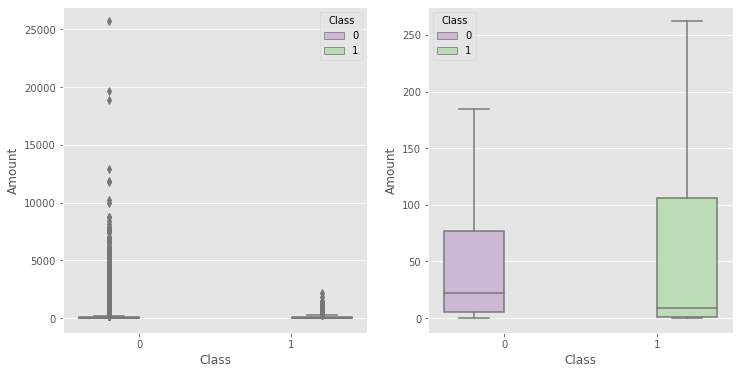

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show()

Text(0.5, 1.0, 'Distribution of Amount')

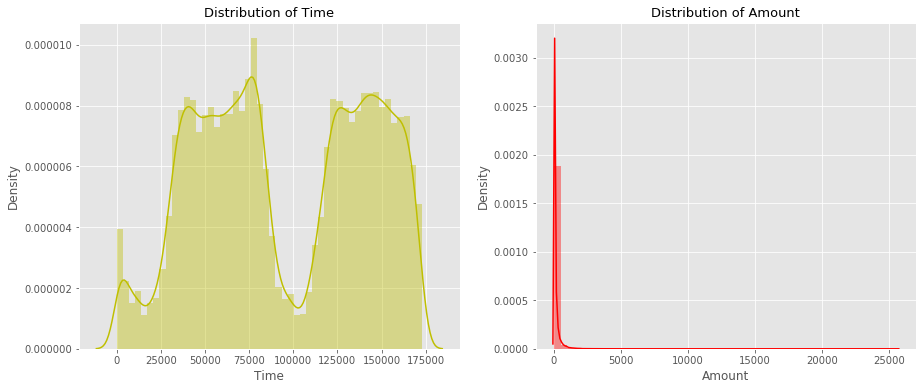

In [8]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(df['Time'], ax=ax1, color='y')
ax2 = sns.distplot(df['Amount'], ax=ax2, color='r')
ax1.set_title('Distribution of Time', fontsize=13)
ax2.set_title('Distribution of Amount', fontsize=13)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

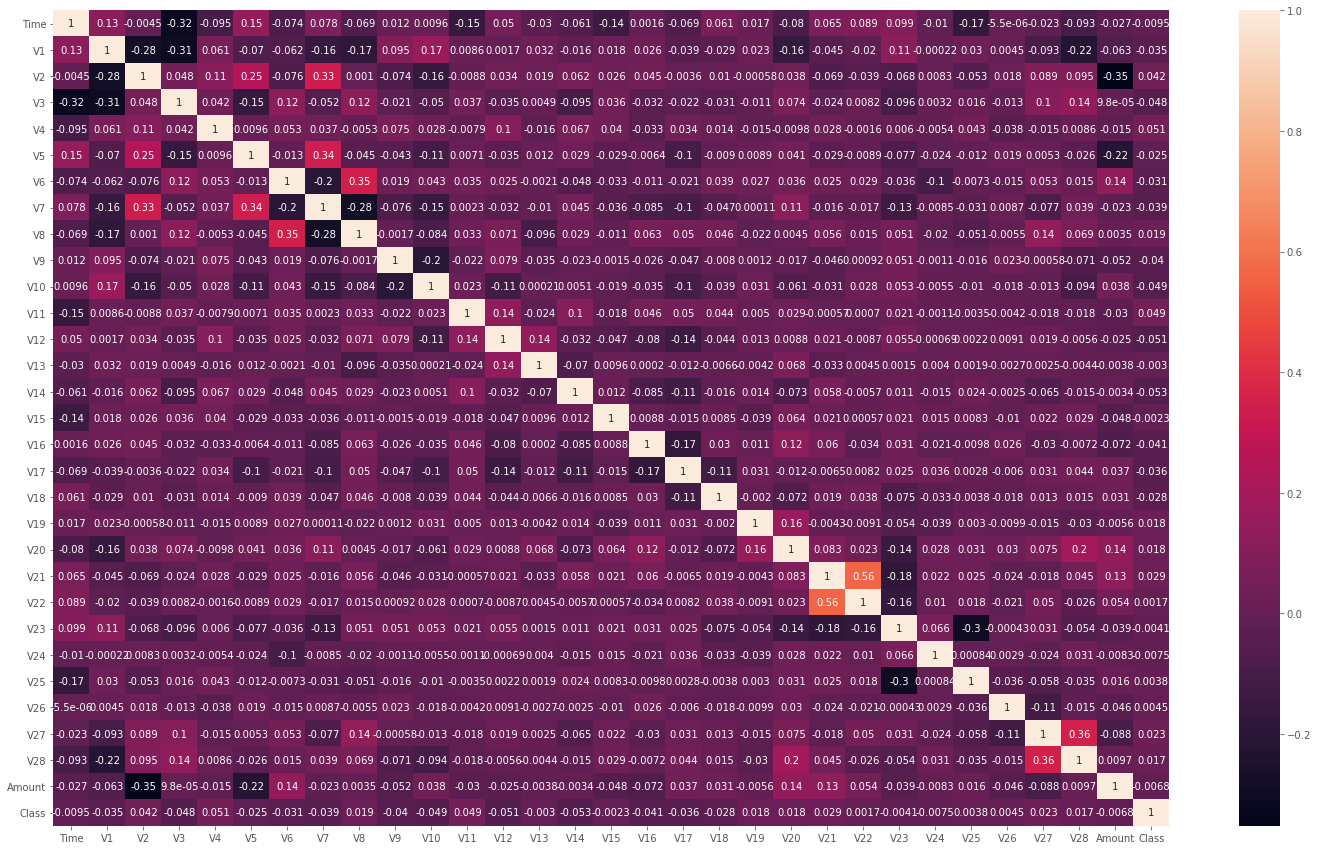

In [9]:
corr = df.corr(method='kendall')
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True)
df.columns

### We see high correlation between some features. Therefore, we might use PCA in order to reduce complexity and increase performance.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [11]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [12]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
124379,77269.0,-0.833,2.055,-0.938,0.121,1.130,0.125,0.908,-0.024,0.091,...,-0.168,-1.370,-0.213,-0.308,0.965,0.506,0.89,0,-0.350,-0.369
52325,45388.0,1.013,-0.573,1.159,0.416,-1.446,-0.673,-0.546,-0.027,0.877,...,-0.073,0.808,0.133,1.078,-0.054,0.035,104.60,0,0.065,-1.041
75237,55963.0,0.480,-2.252,0.584,-0.184,-1.817,0.337,-0.646,0.104,-0.161,...,-0.430,0.069,0.239,-0.288,-0.032,0.088,445.25,0,1.427,-0.818
265330,161840.0,-3.394,2.911,-1.998,-1.693,0.682,-1.839,1.728,-0.825,2.494,...,0.085,-0.104,0.096,-0.005,-0.008,0.104,0.92,0,-0.350,1.411
117810,74821.0,1.385,-0.465,0.186,-0.973,-0.531,-0.263,-0.499,-0.084,-1.198,...,0.005,-0.498,0.332,-0.489,0.005,0.009,30.43,0,-0.232,-0.421


In [13]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256474, 33)
Test Shape: (28333, 33)


In [14]:
from sklearn.preprocessing import StandardScaler
df['normalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

In [15]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [16]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 432 fraudulent transactions in the train data.


## Undersampling. Disadvantage: discard potentially useful information

In [17]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [18]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
48771,46303.0,1.584,-0.750,-0.462,-1.658,-0.553,-0.533,-0.483,-0.296,-2.595,...,-0.208,-0.464,0.806,-0.053,0.001,-0.010,10.00,0,-0.313,-1.022
236440,160506.0,-0.482,1.646,-1.440,0.970,1.289,-0.247,1.190,0.300,-0.742,...,-0.193,-0.118,0.154,-0.361,0.305,0.215,55.96,0,-0.129,1.383
171642,128808.0,-1.021,0.408,1.346,2.442,1.872,0.740,0.198,0.447,-1.090,...,-0.376,-1.128,0.275,0.079,0.076,0.132,0.00,0,-0.353,0.716
188411,137373.0,2.065,0.006,-1.621,0.014,0.641,-0.250,0.154,-0.175,0.176,...,-0.041,0.289,0.343,-0.133,-0.018,-0.064,1.79,0,-0.346,0.896
29166,36777.0,-0.434,0.268,1.478,-1.065,-0.060,-0.224,1.063,-0.245,0.056,...,0.152,-0.441,-0.574,0.620,-0.154,-0.087,116.75,0,0.114,-1.222


In [19]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [20]:
subsample = pd.concat([selected, fraud])
len(subsample)

864

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

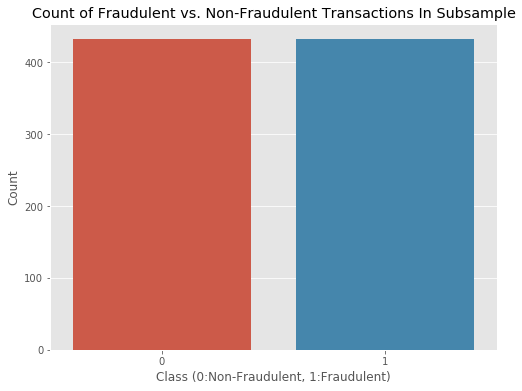

In [21]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [22]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,15389.0,1.214,0.106,0.942,0.179,-0.625,-0.529,-0.394,-0.123,1.236,...,0.136,0.332,-0.006,0.729,-0.086,0.001,9.91,0,-0.314,-1.673
1,125658.0,0.224,2.994,-3.432,3.987,3.760,0.166,1.099,-0.655,-2.435,...,-0.422,-1.048,0.726,0.269,0.284,0.419,0.00,1,-0.353,0.650
2,67194.0,-1.030,1.486,1.024,0.791,-0.193,-0.238,0.318,0.403,-0.564,...,-0.046,0.074,-0.249,-0.394,0.029,0.147,20.00,0,-0.273,-0.582
3,102572.0,-28.709,22.058,-27.856,11.845,-18.984,6.474,-43.557,-41.044,-13.320,...,5.466,0.024,-1.527,-0.145,-5.682,-0.439,0.01,1,-0.353,0.163
4,1494.0,0.988,-0.267,0.839,0.537,-0.645,0.104,-0.400,0.186,0.070,...,0.038,0.048,0.038,0.216,-0.007,0.027,84.00,0,-0.017,-1.965
5,133958.0,0.524,1.532,-4.176,3.585,-1.024,-0.502,-1.892,0.878,-1.542,...,0.454,0.485,-0.501,-0.108,0.269,-0.063,130.21,1,0.167,0.824
6,64855.0,1.144,-0.086,0.954,0.251,-1.086,-1.201,-0.161,-0.214,0.223,...,0.174,0.974,-0.050,0.749,-0.064,0.029,47.04,0,-0.165,-0.631
7,46897.0,0.501,-1.456,0.791,0.444,-1.090,1.006,-0.546,0.439,0.915,...,-0.127,-0.216,-0.166,0.923,-0.062,0.049,305.49,0,0.868,-1.009
8,157110.0,1.714,-0.717,0.160,1.110,-1.159,0.099,-1.081,0.155,1.835,...,0.084,-0.014,-0.401,0.385,0.059,0.015,99.78,0,0.046,1.312
9,160637.0,1.978,-0.243,-0.986,0.497,-0.226,-0.717,-0.045,-0.140,0.836,...,0.016,0.121,0.230,-0.169,-0.005,-0.066,7.11,0,-0.325,1.386


## Removing outliers

In [23]:

Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [24]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 864 transactions by 251 transactions to 613 transactions.


In [25]:
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,15389.0,1.214,0.106,0.942,0.179,-0.625,-0.529,-0.394,-0.123,1.236,...,0.136,0.332,-0.006,0.729,-0.086,0.001,9.91,0,-0.314,-1.673
1,125658.0,0.224,2.994,-3.432,3.987,3.760,0.166,1.099,-0.655,-2.435,...,-0.422,-1.048,0.726,0.269,0.284,0.419,0.00,1,-0.353,0.650
2,67194.0,-1.030,1.486,1.024,0.791,-0.193,-0.238,0.318,0.403,-0.564,...,-0.046,0.074,-0.249,-0.394,0.029,0.147,20.00,0,-0.273,-0.582
4,1494.0,0.988,-0.267,0.839,0.537,-0.645,0.104,-0.400,0.186,0.070,...,0.038,0.048,0.038,0.216,-0.007,0.027,84.00,0,-0.017,-1.965
5,133958.0,0.524,1.532,-4.176,3.585,-1.024,-0.502,-1.892,0.878,-1.542,...,0.454,0.485,-0.501,-0.108,0.269,-0.063,130.21,1,0.167,0.824


In [26]:
#df = df.drop(['Time'],axis=1)
len(df2)

613

In [27]:
X = df2.drop('Class', axis=1)
y = df2['Class']

## Using PCA 

###  It enables removing the redundancy or correlation that can exist when explaining data using large number of features. Here, the number of features  is reduced from 32 to 20.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components = 20)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
X_pca = pca.transform(X)

In [31]:
X_pca.shape

(613, 20)

## DECISION TREE

In [32]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [33]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
y_pred = decision_tree.predict(X_test)

In [35]:
decision_tree.score(X_test,y_test)

0.8967391304347826

In [36]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [37]:
cnf_matrix = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[109   7]
 [ 12  56]]


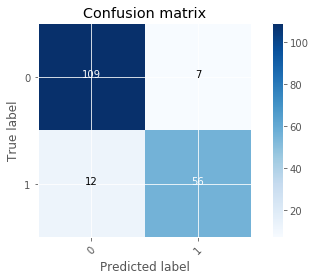

In [38]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       116
           1       0.89      0.82      0.85        68

    accuracy                           0.90       184
   macro avg       0.89      0.88      0.89       184
weighted avg       0.90      0.90      0.90       184



In [40]:
y_pred = decision_tree.predict(X)

In [41]:
y_expected = pd.DataFrame(y)

Confusion matrix, without normalization
[[382   7]
 [ 12 212]]


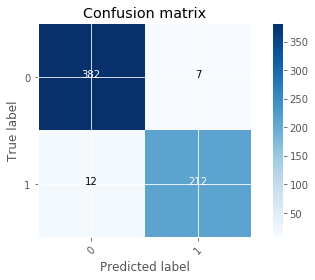

In [42]:
cnf_matrix = confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

## RANDOM FOREST

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
random_forest = RandomForestClassifier(n_estimators=100)

In [45]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
y_pred = random_forest.predict(X_test)

In [47]:
random_forest.score(X_test,y_test)

0.9402173913043478

In [48]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [49]:
cnf_matrix = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[115   1]
 [ 10  58]]


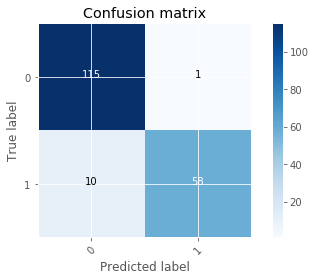

In [50]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [51]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       116
           1       0.98      0.85      0.91        68

    accuracy                           0.94       184
   macro avg       0.95      0.92      0.93       184
weighted avg       0.94      0.94      0.94       184



1. accuracy: (tp + tn)/(tp + tn + fp + fn) 
2. precision: tp/(tp + fp)
3. recall: tp/(tp + fn)
4. f1-score: 2\*precision*recall/(precision + recall)

In [52]:
y_pred = random_forest.predict(X)

In [53]:
cnf_matrix = confusion_matrix(y,y_pred.round())

Confusion matrix, without normalization
[[388   1]
 [ 10 214]]


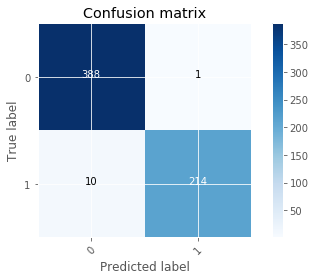

In [54]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

## LOGISTIC REGRESSION

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred = logmodel.predict(X_test)

In [58]:
logmodel.score(X_test,y_test)

0.9239130434782609

In [59]:
cnf_matrix = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[113   3]
 [ 11  57]]


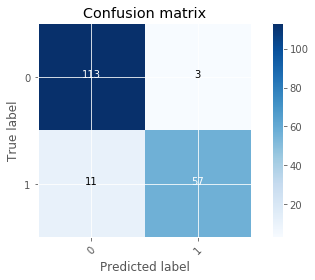

In [60]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       116
           1       0.95      0.84      0.89        68

    accuracy                           0.92       184
   macro avg       0.93      0.91      0.92       184
weighted avg       0.93      0.92      0.92       184



In [62]:
y_pred = random_forest.predict(X)

In [63]:
cnf_matrix = confusion_matrix(y,y_pred)

Confusion matrix, without normalization
[[388   1]
 [ 10 214]]


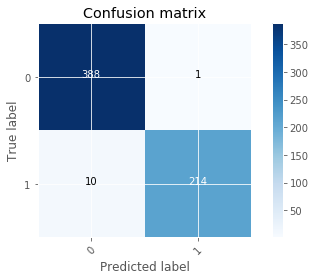

In [64]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

### In models of fraud detection, we should reduce as much as possible the number of false negatives. Therefore, as the random forest model has superior precision and recall, we should choose it. 